<a href="https://colab.research.google.com/github/sua11111/AI_06_project_sua/blob/main/AI_06_%EC%8B%A0%EC%88%98%EC%95%84_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

gm = pd.read_csv('/content/vgames2.csv')

gm

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
#런타임 재시작 필요
gm.drop(['Unnamed: 0'], axis = 1, inplace = True)
gm

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
#gm

In [8]:
gm['NA_Sales'] = gm['NA_Sales'].replace({'K': '*1e3/1e6', 'M': '*1e6/1e6'}, regex=True).map(pd.eval).astype(float)
gm['EU_Sales'] = gm['EU_Sales'].replace({'K': '*1e3/1e6', 'M': '*1e6/1e6'}, regex=True).map(pd.eval).astype(float)
gm['JP_Sales'] = gm['JP_Sales'].replace({'K': '*1e3/1e6', 'M': '*1e6/1e6'}, regex=True).map(pd.eval).astype(float)
gm['Other_Sales'] = gm['Other_Sales'].replace({'K': '*1e3/1e6', 'M': '*1e6/1e6'}, regex=True).map(pd.eval).astype(float)

In [9]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [ ]:
장르 나라 별 데이터 쪼개기 
4개 별로 
비율로 퍼센트 
원 그래프 
상위 5개만 내림차순 head()


In [163]:
gm_genre= gm.groupby(['Genre'], as_index=False).sum()
gm_genre= gm_genre.drop('Year', axis=1)
gm_genre

gm_genre.sort_values(by=['EU_Sales'], axis=0, ascending=False)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Action,858.78,513.64,156.61,183.99,1713.02
10,Sports,667.26,370.97,134.76,132.35,1305.34
8,Shooter,574.47,310.22,38.18,101.86,1024.73
6,Racing,354.70,235.03,56.32,76.51,722.56
3,Misc,400.29,210.20,104.18,72.74,787.41
4,Platform,445.33,200.62,130.53,51.44,827.92
7,Role-Playing,318.76,183.10,342.93,56.73,901.52
9,Simulation,181.43,113.17,63.54,31.32,389.46
2,Fighting,220.35,99.90,87.14,36.15,443.54
1,Adventure,101.92,63.71,51.89,16.70,234.22


In [173]:
NA_sales= gm_genre.iloc[:,[0,1]]
EU_sales= gm_genre.iloc[:,[0,2]]
JP_sales= gm_genre.iloc[:,[0,3]]

In [178]:
EU_sales.sort_values(by=['EU_Sales'], axis=0, ascending=False)

,Genre,EU_Sales
0,Action,513.64
10,Sports,370.97
8,Shooter,310.22
6,Racing,235.03
3,Misc,210.20
4,Platform,200.62
7,Role-Playing,183.10
9,Simulation,113.17
2,Fighting,99.90
1,Adventure,63.71


In [166]:
EU_sales.sort_values(by=['EU_Sales'], axis=0, ascending=False)

,Genre,EU_Sales
0,Action,513.64
10,Sports,370.97
8,Shooter,310.22
6,Racing,235.03
3,Misc,210.20
4,Platform,200.62
7,Role-Playing,183.10
9,Simulation,113.17
2,Fighting,99.90
1,Adventure,63.71


In [13]:
def percent(a):
 for i in range(len(NA_sales)):
  if 0 < NA_sales['NA_Sales'][i]:     
    NA_sales['NA_Sales'][i] = (NA_sales['NA_Sales'][i]/4372.34)*100.0
 return a

In [14]:
per_NA_sales= percent(NA_sales).sort_values(by=['NA_Sales'], axis=0, ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
per_NA_sales = round(per_NA_sales,2)

In [157]:
per_NA_sales

,Genre,NA_Sales
0,Action,20.01
10,Sports,15.56
8,Shooter,13.31
4,Platform,10.21
3,Misc,9.33
6,Racing,8.17
7,Role-Playing,7.31
2,Fighting,5.10
9,Simulation,4.18
5,Puzzle,2.82


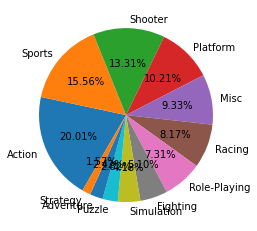

In [20]:
import matplotlib.pyplot as plt

ratio = [20.01, 15.56, 13.31, 10.21, 9.33, 8.17, 
         7.31, 5.10, 4.18, 2.82, 2.42, 1.57]
labels = ['Action', 'Sports', 'Shooter', 'Platform','Misc','Racing','Role-Playing', 
          'Fighting', 'Simulation', 'Puzzle', 'Adventure','Strategy']

explode = [0, 0.10, 0, 0.10]

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=600, counterclock=False)
plt.show()

In [21]:
a = (8.17, 7.31, 5.10, 4.18, 2.82, 2.42, 1.57)
sum(a)

31.57

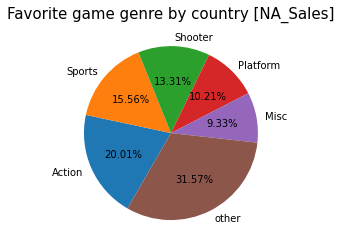

In [121]:
ratio = [20.01, 15.56, 13.31, 10.21, 9.33, 31.57]
labels = ['Action', 'Sports', 'Shooter', 'Platform','Misc','other']

explode = [0, 0.10, 0, 0.10]

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=600, counterclock=False)
plt.title('Favorite game genre by country [NA_Sales]', fontsize=15)
plt.show()

In [161]:
NA_sales.sort_values(by=['NA_Sales'], axis=0, ascending=False)

,Genre,NA_Sales
0,Action,20.007822
10,Sports,15.564206
8,Shooter,13.309121
4,Platform,10.210551
3,Misc,9.332531
6,Racing,8.169310
7,Role-Playing,7.308215
2,Fighting,5.104818
9,Simulation,4.184487
5,Puzzle,2.821144


In [ ]:
NA_sales.sort_values(by=['NA_Sales'], axis=0, ascending=False)

In [24]:
gm_genre.sort_values(by=['NA_Sales'], axis=0, ascending=False)
gm_genre.sort_values(by=['EU_Sales'], axis=0, ascending=False)
gm_genre.sort_values(by=['JP_Sales'], axis=0, ascending=False)
gm_genre.sort_values(by=['Other_Sales'], axis=0, ascending=False)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,874.81,522.16,157.90,186.45
10,Sports,680.52,376.48,135.37,134.67
8,Shooter,581.92,313.05,38.28,102.65
6,Racing,357.19,237.10,56.40,77.10
3,Misc,408.05,212.36,105.27,74.04
7,Role-Playing,319.54,183.58,344.95,56.96
4,Platform,446.44,201.61,130.65,51.53
2,Fighting,223.20,101.22,87.34,36.64
9,Simulation,182.96,113.35,63.70,31.48
1,Adventure,105.66,64.05,51.95,16.81


In [25]:
EU_sales.sum() #  2421.01
def percent(a):
 for i in range(len(EU_sales)):
  if 0 < EU_sales['EU_Sales'][i]:     
    EU_sales['EU_Sales'][i] = (EU_sales['EU_Sales'][i]/ 2421.01)*100.0
 return a

In [167]:
per_EU_Sales.sort_values(by=['EU_Sales'], axis=0, ascending=False)

,Genre,EU_Sales
0,Action,21.567858
10,Sports,15.550535
8,Shooter,12.930554
6,Racing,9.793433
3,Misc,8.771546
4,Platform,8.327516
7,Role-Playing,7.582786
9,Simulation,4.681930
2,Fighting,4.180900
1,Adventure,2.645590


In [26]:
per_EU_Sales= percent(EU_sales).sort_values(by=['EU_Sales'], axis=0, ascending=False)
per_EU_Sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Genre,EU_Sales
0,Action,21.567858
10,Sports,15.550535
8,Shooter,12.930554
6,Racing,9.793433
3,Misc,8.771546
4,Platform,8.327516
7,Role-Playing,7.582786
9,Simulation,4.681930
2,Fighting,4.180900
1,Adventure,2.645590


In [27]:
round(per_EU_Sales, 2)

,Genre,EU_Sales
0,Action,21.57
10,Sports,15.55
8,Shooter,12.93
6,Racing,9.79
3,Misc,8.77
4,Platform,8.33
7,Role-Playing,7.58
9,Simulation,4.68
2,Fighting,4.18
1,Adventure,2.65


In [19]:
a = (6.83, 4.98, 4.45, 4.41, 4.06, 3.87,2.99)
sum(a)

31.590000000000003

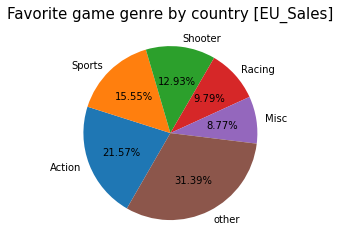

In [122]:
ratio = [21.57, 15.55, 12.93, 9.79 ,8.77, 31.39]
labels = ['Action', 'Sports', 'Shooter', 'Racing','Misc','other']

explode = [0, 0.10, 0, 0.10]

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=600, counterclock=False)
plt.title('Favorite game genre by country [EU_Sales]', fontsize=15)
plt.show()

In [29]:
print(JP_sales.sum()) # 1278.14
def percent(a):
 for i in range(len(JP_sales)):
  if 0 < JP_sales['JP_Sales'][i]:     
    JP_sales['JP_Sales'][i] = (JP_sales['JP_Sales'][i]/ 1278.14)*100.0
 return a

Genre       ActionAdventureFightingMiscPlatformPuzzleRacin...
JP_Sales                                              1278.14
dtype: object


In [30]:
per_JP_Sales= percent(JP_sales).sort_values(by=['JP_Sales'], axis=0, ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
#JP_sales.sort_values(by=['JP_Sales'], axis=0, ascending=False)

In [31]:
round(per_JP_Sales,2)

,Genre,JP_Sales
7,Role-Playing,26.99
0,Action,12.35
10,Sports,10.59
4,Platform,10.22
3,Misc,8.24
2,Fighting,6.83
9,Simulation,4.98
5,Puzzle,4.45
6,Racing,4.41
1,Adventure,4.06


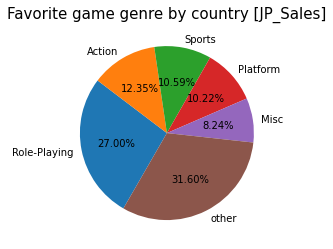

In [126]:
ratio = [26.99, 12.35, 10.59, 10.22, 8.24 , 31.59]
labels = ['Role-Playing', 'Action', 'Sports', 'Platform','Misc','other']

explode = [0, 0.10, 0, 0.10]

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=600, counterclock=False)
plt.title('Favorite game genre by country [JP_Sales]', fontsize=15)
plt.show()

In [33]:
gm.isnull().sum() #Year 271 Genre 50 Publisher 58

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
#제작연도 전처리 1. 결측치 2. 1~2자리 수 연도

In [34]:
gm['Year'] = gm['Year'].fillna(0)

In [35]:
gm.isnull().sum() #Year 271 Genre 50 Publisher 58

Name            0
Platform        0
Year            0
Genre          50
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [36]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [37]:
gm['Year'] = gm['Year'].astype('int')

In [38]:
def add_year(a):
 for i in range(len(gm)):
  if 0 < gm['Year'][i] < 17 :     
    gm['Year'][i] = 2000 + gm['Year'][i]
  elif 85 < gm['Year'][i] < 1980 :
    gm['Year'][i] = 1900 + gm['Year'][i]
  else :
    a
 return a

In [39]:
 gm['Year'] = add_year(gm['Year'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
#gm['Year'][74:84]
#gm['Year'].value_counts()

In [40]:
gm =gm[gm.Year != 0]

In [41]:
gm

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [42]:
gm_preference= gm.iloc[:,[0,1,2,3,5,6,7,8]]
gm_preference

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,0.05,0.05,0.25,0.03


In [43]:
y2008 = gm[(gm['Year'] == 2008)]
y2008
y2008['total_sales'] = y2008['NA_Sales'] + y2008['EU_Sales'] + y2008['JP_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
genre2008= y2008.groupby(['Genre'], as_index=False).sum()
genre2008= genre2008.drop('Year', axis=1)
#gm_genre
genre2008

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Action,72.30,38.70,6.00,18.46,117.00
1,Adventure,13.01,5.62,4.34,1.94,22.97
2,Fighting,18.23,7.17,6.15,3.86,31.55
3,Misc,47.52,21.00,7.24,10.42,75.76
4,Platform,17.57,10.78,2.36,4.94,30.71
5,Puzzle,8.18,5.13,0.92,1.30,14.23
6,Racing,33.50,24.32,4.21,8.70,62.03
7,Role-Playing,25.25,11.30,17.51,5.63,54.06
8,Shooter,34.95,16.29,0.77,7.50,52.01
9,Simulation,26.62,12.12,3.66,4.00,42.40


In [45]:
gm['total_sales'] = round(gm['NA_Sales'],2) + round(gm['EU_Sales'],2) + round(gm['JP_Sales'],2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
y2010 = gm[(gm['Year'] == 2010)]

In [47]:
y2009 = gm[(gm['Year'] == 2009)]
g2009= y2009.groupby(['Genre'], as_index=False).sum()
g2009= g2009.drop('Year', axis=1)

y2008 = gm[(gm['Year'] == 2008)]
g2008= y2008.groupby(['Genre'], as_index=False).sum()
g2008= g2008.drop('Year', axis=1)

y2010 = gm[(gm['Year'] == 2010)]
g2010= y2010.groupby(['Genre'], as_index=False).sum()
g2010= g2010.drop('Year', axis=1)

y2001 = gm[(gm['Year'] == 2001)]
g2001= y2001.groupby(['Genre'], as_index=False).sum()
g2001= g2001.drop('Year', axis=1)


y2002 = gm[(gm['Year'] == 2002)]
g2002= y2002.groupby(['Genre'], as_index=False).sum()
g2002= g2002.drop('Year', axis=1)

y2003 = gm[(gm['Year'] == 2003)]
g2003= y2003.groupby(['Genre'], as_index=False).sum()
g2003= g2003.drop('Year', axis=1)

y2004 = gm[(gm['Year'] == 2004)]
g2004= y2004.groupby(['Genre'], as_index=False).sum()
g2004= g2004.drop('Year', axis=1)

y2005 = gm[(gm['Year'] == 2005)]
g2005= y2005.groupby(['Genre'], as_index=False).sum()
g2005= g2005.drop('Year', axis=1)

y2006 = gm[(gm['Year'] == 2006)]
g2006= y2006.groupby(['Genre'], as_index=False).sum()
g2006= g2006.drop('Year', axis=1)

y2007 = gm[(gm['Year'] == 2007)]
g2007= y2007.groupby(['Genre'], as_index=False).sum()
g2007= g2007.drop('Year', axis=1)

y2011 = gm[(gm['Year'] == 2011)]
g2011= y2011.groupby(['Genre'], as_index=False).sum()
g2011= g2011.drop('Year', axis=1)

y2012 = gm[(gm['Year'] == 2012)]
g2012= y2012.groupby(['Genre'], as_index=False).sum()
g2012= g2012.drop('Year', axis=1)

y2013 = gm[(gm['Year'] == 2013)]
g2013= y2013.groupby(['Genre'], as_index=False).sum()
g2013= g2013.drop('Year', axis=1)

y2014 = gm[(gm['Year'] == 2014)]
g2014= y2014.groupby(['Genre'], as_index=False).sum()
g2014= g2014.drop('Year', axis=1)

y2015 = gm[(gm['Year'] == 2015)]
g2015= y2015.groupby(['Genre'], as_index=False).sum()
g2015= g2015.drop('Year', axis=1)

y2016 = gm[(gm['Year'] == 2016)]
g2016= y2016.groupby(['Genre'], as_index=False).sum()
g2016= g2016.drop('Year', axis=1)

y2017 = gm[(gm['Year'] == 2017)]
g2017= y2017.groupby(['Genre'], as_index=False).sum()
g2017= g2017.drop('Year', axis=1)

y2018 = gm[(gm['Year'] == 2018)]
g2018= y2018.groupby(['Genre'], as_index=False).sum()
g2018= g2018.drop('Year', axis=1)

y2019 = gm[(gm['Year'] == 2019)]
g2019= y2019.groupby(['Genre'], as_index=False).sum()
g2019= g2019.drop('Year', axis=1)

y2020 = gm[(gm['Year'] == 2020)]
g2020= y2020.groupby(['Genre'], as_index=False).sum()
g2020= g2020.drop('Year', axis=1)


y2000 = gm[(gm['Year'] == 2000)]
g2000= y2000.groupby(['Genre'], as_index=False).sum()
g2000= g2000.drop('Year', axis=1)
#21

In [48]:
y1980 = gm[(gm['Year'] == 1980)]
g1980= y1980.groupby(['Genre'], as_index=False).sum()
g1980= g1980.drop('Year', axis=1)

y1981 = gm[(gm['Year'] == 1981)]
g1981= y1981.groupby(['Genre'], as_index=False).sum()
g1981= g1981.drop('Year', axis=1)

y1982 = gm[(gm['Year'] == 1982)]
g1982= y1982.groupby(['Genre'], as_index=False).sum()
g1982= g1982.drop('Year', axis=1)

y1983 = gm[(gm['Year'] == 1983)]
g1983= y1983.groupby(['Genre'], as_index=False).sum()
g1983= g1983.drop('Year', axis=1)

y1984 = gm[(gm['Year'] == 1984)]
g1984= y1984.groupby(['Genre'], as_index=False).sum()
g1984= g1984.drop('Year', axis=1)

y1985 = gm[(gm['Year'] == 1985)]
g1985= y1985.groupby(['Genre'], as_index=False).sum()
g1985= g1985.drop('Year', axis=1)

y1986 = gm[(gm['Year'] == 1986)]
g1986= y1986.groupby(['Genre'], as_index=False).sum()
g1986= g1986.drop('Year', axis=1)

y1987 = gm[(gm['Year'] == 1987)]
g1987= y1987.groupby(['Genre'], as_index=False).sum()
g1987= g1987.drop('Year', axis=1)

y1988 = gm[(gm['Year'] == 1988)]
g1988= y1988.groupby(['Genre'], as_index=False).sum()
g1988= g1988.drop('Year', axis=1)

y1989 = gm[(gm['Year'] == 1989)]
g1989= y1989.groupby(['Genre'], as_index=False).sum()
g1989= g1989.drop('Year', axis=1)

y1990 = gm[(gm['Year'] == 1990)]
g1990= y1990.groupby(['Genre'], as_index=False).sum()
g1990= g1990.drop('Year', axis=1)

y1991 = gm[(gm['Year'] == 1991)]
g1991= y1991.groupby(['Genre'], as_index=False).sum()
g1991= g1991.drop('Year', axis=1)

y1992 = gm[(gm['Year'] == 1992)]
g1992= y1992.groupby(['Genre'], as_index=False).sum()
g1992= g1992.drop('Year', axis=1)

y1993 = gm[(gm['Year'] == 1993)]
g1993= y1993.groupby(['Genre'], as_index=False).sum()
g1993= g1993.drop('Year', axis=1)

y1994 = gm[(gm['Year'] == 1994)]
g1994= y1994.groupby(['Genre'], as_index=False).sum()
g1994= g1994.drop('Year', axis=1)

y1995 = gm[(gm['Year'] == 1995)]
g1995= y1995.groupby(['Genre'], as_index=False).sum()
g1995= g1995.drop('Year', axis=1)

y1996 = gm[(gm['Year'] == 1996)]
g1996= y1996.groupby(['Genre'], as_index=False).sum()
g1996= g1996.drop('Year', axis=1)

y1997 = gm[(gm['Year'] == 1997)]
g1997= y1997.groupby(['Genre'], as_index=False).sum()
g1997= g1997.drop('Year', axis=1)

y1998 = gm[(gm['Year'] == 1998)]
g1998= y1998.groupby(['Genre'], as_index=False).sum()
g1998= g1998.drop('Year', axis=1)

y1999 = gm[(gm['Year'] == 1999)]
g1999= y1999.groupby(['Genre'], as_index=False).sum()
g1999= g1999.drop('Year', axis=1)

In [49]:
g1999

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Action,14.85,8.64,2.90,1.23,26.39
1,Adventure,3.32,2.78,1.11,0.40,7.21
2,Fighting,8.51,2.65,2.83,0.32,13.99
3,Misc,11.95,3.73,4.32,0.68,20.00
4,Platform,13.00,5.34,1.66,0.80,20.00
5,Puzzle,0.81,0.45,0.02,0.06,1.28
6,Racing,21.15,11.11,3.35,1.58,35.61
7,Role-Playing,16.67,10.75,18.01,1.81,45.43
8,Shooter,7.77,3.73,0.29,0.44,11.79
9,Simulation,3.41,1.33,6.12,0.60,10.86


In [50]:
import numpy as np
a = g1999.loc[g1999['total_sales'].idxmax()]
df = pd.DataFrame(np.array(a))
df = df.transpose()
df

,0,1,2,3,4,5
0,Role-Playing,16.67,10.75,18.01,1.81,45.43


In [51]:
g1990.loc[g1990['total_sales'].idxmax()]
g1991.loc[g1991['total_sales'].idxmax()]
g1992.loc[g1992['total_sales'].idxmax()]
g1993.loc[g1993['total_sales'].idxmax()]
g1994.loc[g1994['total_sales'].idxmax()]
g1995.loc[g1995['total_sales'].idxmax()]
g1996.loc[g1996['total_sales'].idxmax()]
g1997.loc[g1997['total_sales'].idxmax()]
g1998.loc[g1998['total_sales'].idxmax()]
g1999.loc[g1999['total_sales'].idxmax()]

g1980.loc[g1980['total_sales'].idxmax()]
g1981.loc[g1981['total_sales'].idxmax()]
g1982.loc[g1982['total_sales'].idxmax()]
g1983.loc[g1983['total_sales'].idxmax()]
g1984.loc[g1984['total_sales'].idxmax()]
g1985.loc[g1985['total_sales'].idxmax()]
g1986.loc[g1986['total_sales'].idxmax()]
g1987.loc[g1987['total_sales'].idxmax()]
g1988.loc[g1988['total_sales'].idxmax()]
g1989.loc[g1989['total_sales'].idxmax()]

g2000.loc[g2000['total_sales'].idxmax()]
g2001.loc[g2001['total_sales'].idxmax()]
g2002.loc[g2002['total_sales'].idxmax()]
g2003.loc[g2003['total_sales'].idxmax()]
g2004.loc[g2004['total_sales'].idxmax()]
g2005.loc[g2005['total_sales'].idxmax()]
g2006.loc[g2006['total_sales'].idxmax()]
g2007.loc[g2007['total_sales'].idxmax()]
g2008.loc[g2008['total_sales'].idxmax()]
g2009.loc[g2009['total_sales'].idxmax()]
g2010.loc[g2010['total_sales'].idxmax()]

g2010.loc[g2010['total_sales'].idxmax()]
g2011.loc[g2011['total_sales'].idxmax()]
g2012.loc[g2012['total_sales'].idxmax()]
g2013.loc[g2013['total_sales'].idxmax()]
g2014.loc[g2014['total_sales'].idxmax()]
g2015.loc[g2015['total_sales'].idxmax()]
g2016.loc[g2016['total_sales'].idxmax()]
g2017.loc[g2017['total_sales'].idxmax()]
#g2018.loc[g2018['total_sales'].idxmax()]
#g2019.loc[g2019['total_sales'].idxmax()]
g2020.loc[g2020['total_sales'].idxmax()]

Genre          Simulation
NA_Sales             0.27
EU_Sales                0
JP_Sales                0
Other_Sales          0.02
total_sales          0.27
Name: 0, dtype: object

In [53]:
trend = pd.DataFrame({'year':[1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
                              1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
                              2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
                              2010,2011,2012,2013,2014,2015,2016,2017,2020],
      'genre':['Shooter', 'Action', 'Puzzle','Platform','Shooter','Platform','Action','Fighting','Platform','Puzzle',
               'Platform','Platform','Fighting','Platform','Platform','Platform','Role-Playing','Racing','Sports','Role-Playing',
               'Sports','Action','Action','Action','Action','Action','Sports','Action','Action','Sports',
               'Action','Action','Action','Action','Action','Action','Action','Role-Playing','Simulation'],
      'total_sales':[6.99,14.67,9.93, 6.85,30.6,42.37,13.49,5.32,27.03,36.92,
                      22.41, 7.46,14.91,18.03,27.63,16.19,42.6,30.43,39.97,45.43,
                      38.88,52.49,79.92,62.81,59.93,77.89,121.8,90.62,117,123.45,
                      104.65,105.59,106.67,109.88,85.71,61.28,18.02,0.04,0.27]})
trend

,year,genre,total_sales
0,1980,Shooter,6.99
1,1981,Action,14.67
2,1982,Puzzle,9.93
3,1983,Platform,6.85
4,1984,Shooter,30.60
5,1985,Platform,42.37
6,1986,Action,13.49
7,1987,Fighting,5.32
8,1988,Platform,27.03
9,1989,Puzzle,36.92


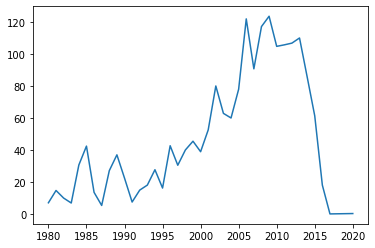

In [128]:
from matplotlib import pyplot as plt
plt.plot(trend['year'], trend['total_sales'])

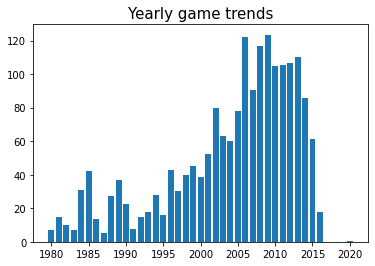

In [131]:
plt.bar(trend['year'], trend['total_sales'],alpha=1)
#plt.xticks(x, years) Yearly game trends
plt.title('Yearly game trends', fontsize=15)
plt.show()

In [56]:
trend.groupby(['genre'], as_index=False).count()

,genre,year,total_sales
0,Action,16,16
1,Fighting,2,2
2,Platform,8,8
3,Puzzle,2,2
4,Racing,1,1
5,Role-Playing,3,3
6,Shooter,2,2
7,Simulation,1,1
8,Sports,4,4


In [183]:
trend19 = pd.DataFrame({'count':[1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
                                 1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
                                 ],
                       'genre':['Shooter', 'Action', 'Puzzle','Platform','Shooter',
                                'Platform','Action','Fighting','Platform','Puzzle',
                                'Platform','Platform','Fighting','Platform','Platform',
                                'Platform','Role-Playing','Racing','Sports','Role-Playing']})

In [188]:
trend19_count= trend19.groupby(['genre'], as_index=False).count()
trend19_count.sort_values(by=['count'], axis=0, ascending=False)

In [143]:
#(2/20)*100.0  #10.0. 22121 5 10 5 Racing	 Shooter	Sports	
#(1/20)*100.0  #5.0
#(8/20)*100.0  #40.0

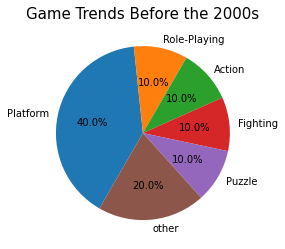

In [181]:
ratio = [40,10,10,10,10,20]
labels = ['Platform', 'Role-Playing$', 'Action','Fighting', 'Puzzle','other']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=600, counterclock=False)
plt.title('Game Trends Before the 2000s', fontsize=15)

plt.show()

In [190]:
trend20 = pd.DataFrame({'count':[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
                                2010,2011,2012,2013,2014,2015,2016,2017,2020],
      'genre':['Sports','Action','Action','Action','Action','Action','Sports','Action','Action','Sports',
               'Action','Action','Action','Action','Action','Action','Action','Role-Playing','Simulation']})

In [139]:
trend20.groupby(['genre'], as_index=False).count()

,genre,year
0,Action,14
1,Role-Playing,1
2,Simulation,1
3,Sports,3


In [191]:
trend20_count= trend20.groupby(['genre'], as_index=False).count()
trend20_count.sort_values(by=['count'], axis=0, ascending=False)

,genre,count
0,Action,14
3,Sports,3
1,Role-Playing,1
2,Simulation,1


In [154]:
#(14/19)*100.0  #73.68 22121 5 10 5 Racing	 Shooter	Sports	
#(1/19)*100.0  #5.26
#(1/19)*100.0  #5.26
#(3/19)*100.0  #15.79

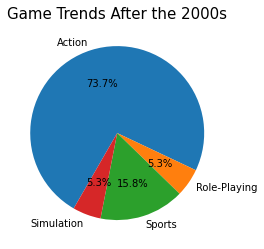

In [180]:
ratio = [73.68,5.26,15.79,5.26]
labels = ['Action', 'Role-Playing', 'Sports','Simulation']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=600, counterclock=False)
plt.title('Game Trends After the 2000s', fontsize=15)

plt.show()

In [ ]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스
#엑셀에서 최대 출고량 상위 15개를 뽑아보면 전부 닌텐도 사의 게임이엇고
#위 같은 플스 같은 콘솔형 게임이 대부분이었다
#90년도에는 닌텐도 휴대형 게임기인 닌텐도 ds 전용 게임이 인기가 많았지만 
# 2000년대에 들어서 닌텐도사가 개발한 콘솔형 게임인 위를 발표하면서 닌텐도 ds같은 휴대용 게임기의 전용 게임보다
# 위 게임이 출고량이 증가함을 보여주었다.
# 이때의 출고량 때문에 휴대용으로도 되고 콘솔형으로 게임을 할 수 있는 스위치를 발매한 것 같았다.
#또 위(게임기)에서 인기 있던 게임 장르인 스포츠를 스위치로도 가능하고 마리오 시리즈 같은 플랫폼 게임도 가능하니 판매량이 급증할 수 밖에 없다고 생각함
#더하여 닌텐도는 매니아 층도 두텁고 인기있는 게임을 시리즈 별로 업데이트하여 매번 발매를 하니 
#닌텐도와 같은게임과 기계를 만들자(?)


In [61]:
gm['total_sales'] = round(gm['NA_Sales'],2) + round(gm['EU_Sales'],2) + round(gm['JP_Sales'],2) + round(gm['Other_Sales'],2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
gm_top= gm.sort_values(by=['total_sales'], axis=0, ascending=False)
gmtop15 = gm_top.head(15)
gmtop10 = gm_top.head(10)
gmtop5 = gm_top.head(5)
gmtop30 = gm_top.head(30)


In [195]:
gmtop10_count= gmtop10.groupby(['Platform'], as_index=False).count()
#trend20_count.sort_values(by=['count'], axis=0, ascending=False)
gmtop10_count

,Platform,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,DS,1,1,1,1,1,1,1,1,1
1,GB,2,2,2,2,2,2,2,2,2
2,NES,2,2,2,2,2,2,2,2,2
3,Wii,5,5,5,5,5,5,5,5,5


In [199]:
gmtop10_count1 = pd.DataFrame({'Platform':['wii','NES','GB','DS'
                                 ],
                       'percentage':[50.0, 20.0, 20.0, 10.0]})
gmtop10_count1

,Platform,percentage
0,wii,50.0
1,NES,20.0
2,GB,20.0
3,DS,10.0


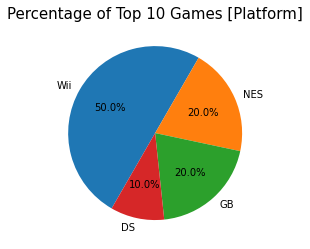

In [85]:
ratio = [50,20,20,10]
labels = ['Wii', 'NES', 'GB','DS']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=600, counterclock=False)
plt.title('Percentage of Top 10 Games [Platform]', fontsize=15)

plt.show()

In [87]:
gmtop10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [97]:
#(41.49/ 82.74)*100.0 #50.15
#(29.02/ 82.74)*100.0 #35.07
#(3.77/ 82.74)*100.0  #4.56
#(8.46/ 82.74)*100.0  #10.22
50.15, 35.07,4.56,10.22

#(29.08/ 40.24)*100.0  #72.27
#(3.58/ 40.24)*100.0   #8.90
#(6.81	/ 40.24)*100.0 #16.92
#(0.77/ 40.24)*100.0   #1.91

72.27,8.90,16.92,1.91

In [208]:
first_count1 = pd.DataFrame({'Sales':['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'
                                 ],
                       'Percentage':[50.15, 35.07,4.56,10.22]}) #41.49, 29.02, 3.77, 8.46
first_count1

,Sales,Percentage
0,NA_Sales,50.15
1,EU_Sales,35.07
2,JP_Sales,4.56
3,Other_Sales,10.22


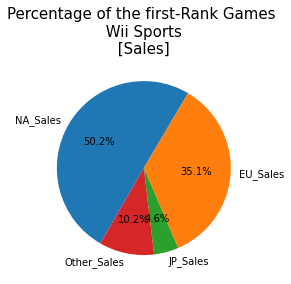

In [206]:
ratio = [50.15, 35.07,4.56,10.22]
labels = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=600, counterclock=False)
plt.title('Percentage of the first-Rank Games \n Wii Sports \n [Sales] ', fontsize=15)

plt.show()

In [ ]:
29.08, 3.58,6.81,0.77

72.27,8.90,16.92,1.91

In [209]:
second_count1 = pd.DataFrame({'Sales':['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'
                                 ],
                       'million':[29.08, 3.58,6.81,0.77]}) 
second_count1

,Sales,million
0,NA_Sales,29.08
1,EU_Sales,3.58
2,JP_Sales,6.81
3,Other_Sales,0.77


In [210]:
second_count2 = pd.DataFrame({'Sales':['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'
                                 ],
                       'Percentage':[72.27,8.90,16.92,1.91]}) #41.49, 29.02, 3.77, 8.46
second_count2

,Sales,Percentage
0,NA_Sales,72.27
1,EU_Sales,8.90
2,JP_Sales,16.92
3,Other_Sales,1.91


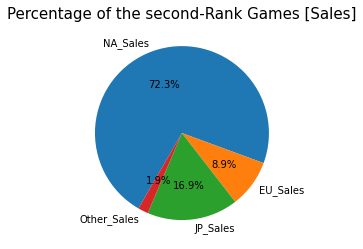

In [101]:
ratio = [72.27,8.90,16.92,1.91]
labels = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=600, counterclock=False)
plt.title('Percentage of the second-Rank Games [Sales]', fontsize=15)

plt.show()

In [114]:
#(23/ 30)*100.0 #76.67
#(1/ 30)*100.0  #3.33
#(4/ 30)*100.0  #13.33
#(1/ 30)*100.0  #3.33
#(1/ 30)*100.0  #3.33

In [214]:
publisher_count1 = pd.DataFrame({'Name$':['Nintendo',	'Take-Two Interactive',	'other'
                                 ],
                       'Percentage':[76.67,13.33,9.99]}) 
publisher_count1

,Name,Percentage
0,Nintendo,76.67
1,Take-Two Interactive,13.33
2,other,9.99


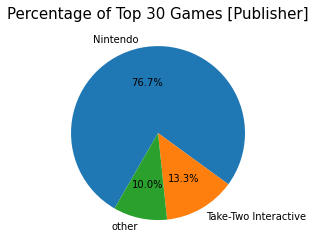

In [117]:
ratio = [76.67,13.33,9.99]
labels = ['Nintendo',	'Take-Two Interactive',	'other']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=600, counterclock=False)
plt.title('Percentage of Top 30 Games [Publisher]', fontsize=15)

plt.show()

In [109]:
gmtop30
23 1 4 1 1 
Nintendo	23
Microsoft Game Studios 
Sony Computer Entertainment	
Activision
Take-Two Interactive 4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [213]:
#gmtop30

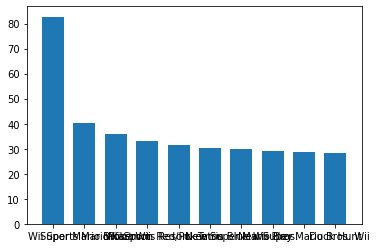

In [105]:
plt.bar(gmtop10['Name'], gmtop10['total_sales'],width=0.7) #alpha=0.3 투명도 설정
#plt.xticks(x, years)
plt.show()

In [118]:
gmtop5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [216]:
top5_count1 = pd.DataFrame({'Name':['Wii Sports','Super Mario Bros.','Mario Kart Wii','Wii Sports Resort','Pokemon Red/Pokemon Blue'
                                 ],
                       'total_sales$':[82.74,40.24,35.83,33.00,31.38]}) 
top5_count1


,Name,total_sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.83
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.38


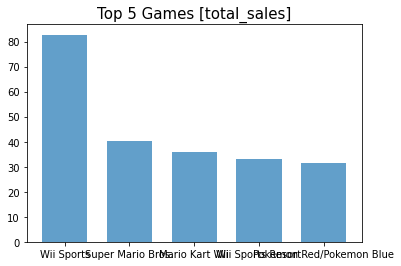

In [182]:
plt.bar(gmtop5['Name'], gmtop5['total_sales'],width=0.7,alpha=0.7) #alpha=0.3 투명도 설정
plt.title('Top 5 Games [total_sales]', fontsize=15)
plt.show()

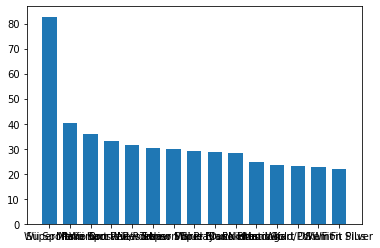

In [72]:
plt.bar(gmtop15['Name'], gmtop15['total_sales'],width=0.7) #alpha=0.3 투명도 설정
#plt.xticks(x, years)
plt.show()

In [88]:
#gmtop15

In [63]:
gm.loc[gm['total_sales'].idxmax(15)]

Name           Wii Sports
Platform              Wii
Year                 2006
Genre              Sports
Publisher        Nintendo
NA_Sales            41.49
EU_Sales            29.02
JP_Sales             3.77
Other_Sales          8.46
total_sales         82.74
Name: 2908, dtype: object

In [70]:
#gm['Year'].value_counts()

###vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv


In [81]:
gm_preference['NA_Sales'].max()

41.49

In [104]:
gm_preference.loc[gm_preference['NA_Sales'].idxmax()]

Name           Wii Sports
Platform              Wii
Year                 2006
Genre              Sports
NA_Sales            41.49
EU_Sales            29.02
JP_Sales             3.77
Other_Sales          8.46
Name: 2908, dtype: object

In [74]:
gm1= gm.groupby(['Year'], as_index=False).count()

In [119]:
gm1= gm.groupby(['Year'], as_index=False)

In [44]:
#gm_preference.loc[gm_preference['Genre'].idxmax()]

In [102]:
gm_preference.loc[gm_preference.groupby(['Platform'])['NA_Sales'].idxmax()]

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5820,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.00,0.08
9578,Policenauts,3DO,1995,Adventure,0.00,0.00,0.06,0.00
1971,Pokemon X/Pokemon Y,3DS,2013,NaN,5.17,4.05,4.34,0.79
324,Sonic Adventure,DC,1998,Platform,1.26,0.61,0.46,0.08
6937,New Super Mario Bros.,DS,2006,Platform,11.38,9.23,6.50,2.90
1203,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58
10917,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50
10159,Super Smash Bros. Melee,GC,2001,Fighting,4.41,1.04,1.39,0.22
5040,Sonic the Hedgehog 2,GEN,1992,Platform,4.47,1.20,0.16,0.19
14865,Sonic the Hedgehog 2 (8-bit),GG,1992,Platform,0.00,0.00,0.04,0.00


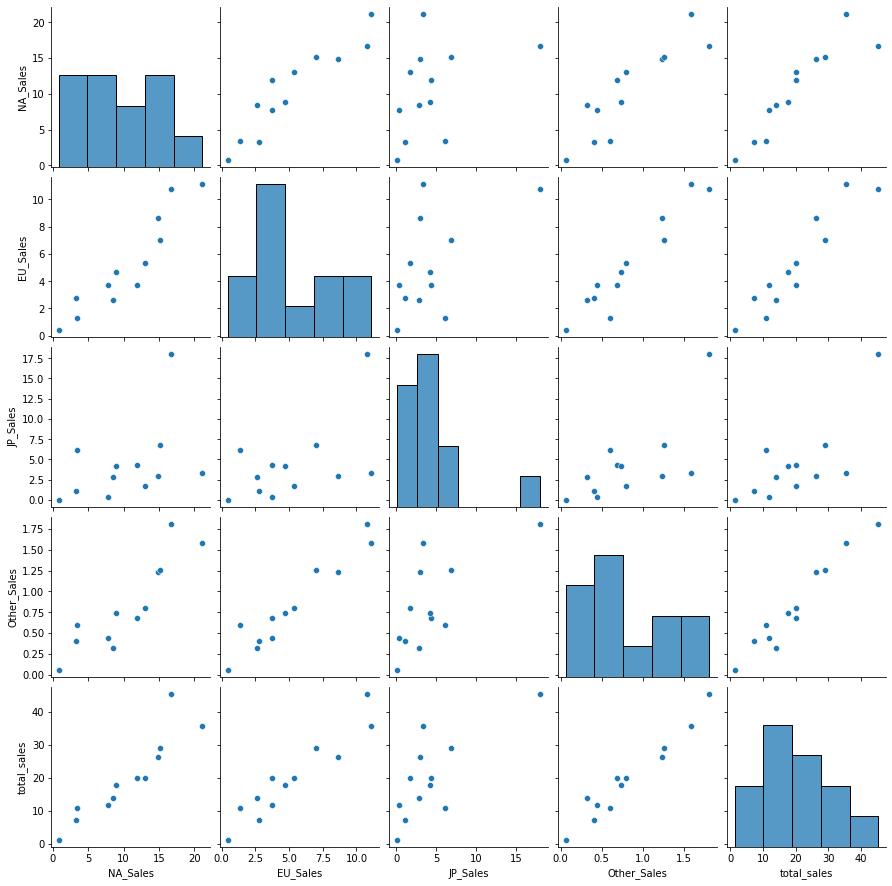

In [95]:
import seaborn as sns

sns.pairplot(g1999)